# Pymaceuticals Inc.
---

### Analysis

- A total of 248 mice were tested and the ratio of male to female was fairly split at 51% and 49% respectively
- Ramicane and Capumulin showed more consistent results given the smaller standard deviation of 4.84 and 4.99 respectively. Ketapril and Naftisol had more varrying results with a larger standard deviation of 8.29 and 8.13 respectively. The standard deviation of all other drugs are within these ranges
- There is a high positive correlation of 0.84 between mouse weight and tumor volume. As mouse weight increases, so does the tumor volume.
- Infubinol and Ceftamin were generally tested on mice with a high tumor volume, the median of which at about 60 mm3. Capomulin and Ramicane were tested on mice with a smaller tumor volume, the median of which at around 40 mm3.


Data generated by Mockaroo, LLC(2022). Realistic Data Generator
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df['Mouse ID'][mouse_study_df.duplicated()].to_numpy()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989 = mouse_study_df[mouse_study_df['Mouse ID'] == 'g989']
duplicate_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = mouse_study_df.drop(mouse_study_df[mouse_study_df['Mouse ID'] == 'g989'].index)
clean_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_study_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_study_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = clean_study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
calculated_df = pd.DataFrame({'Mean Tumor Volume':mean,
                              'Median Tumor Volume':median,
                              'Tumor Volume Variance':variance,
                              'Tumor Volume Std. Dev.':standard_deviation,
                              'Tumor Volume Std. Err.':sem
})
calculated_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
clean_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

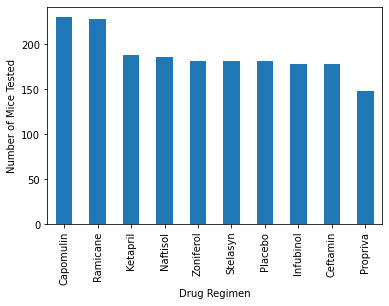

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_study_df['Drug Regimen'].value_counts().plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

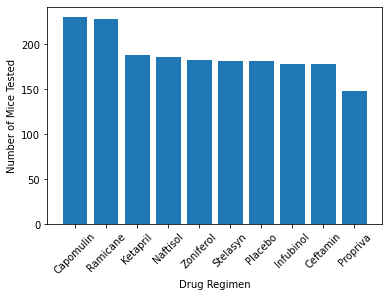

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(clean_study_df['Drug Regimen'].value_counts().index, clean_study_df['Drug Regimen'].value_counts())
plt.xticks(rotation =45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

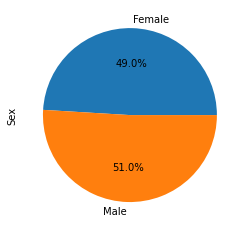

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_study_df.groupby(['Sex'])['Sex'].count()
sex.plot.pie(autopct='%1.1f%%')
plt.show()

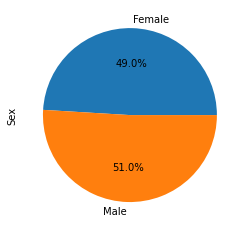

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_study_df.groupby(['Sex'])['Sex'].count()
plt.pie(sex.values, labels = sex.index.values, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_study_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()
grteatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(greatest_timepoint, clean_study_df, on = ('Drug Regimen', 'Mouse ID', 'Timepoint'), how = 'left')
merge_df


,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,Male,12,25,70.827796,2
244,Zoniferol,s337,45,Male,14,27,62.109651,4
245,Zoniferol,w140,5,Female,19,30,47.717952,0
246,Zoniferol,w575,45,Female,16,28,68.401286,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_df.loc[merge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5*  iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print("{}'s potential outliers: {}".format(drug, outliers))

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


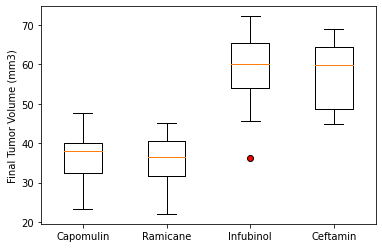

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatment_list, flierprops = dict(markerfacecolor = 'red'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

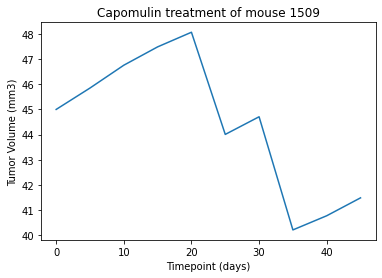

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_study_df.loc[(clean_study_df["Drug Regimen"] == "Capomulin") & (clean_study_df["Mouse ID"] == "l509")]
x = line_df['Timepoint']
y = line_df['Tumor Volume (mm3)']
plt.plot(x, y)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatment of mouse 1509')
plt.show()

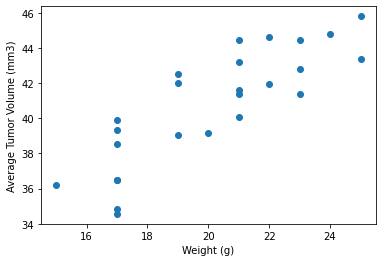

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = clean_study_df.loc[clean_study_df["Drug Regimen"]=="Capomulin", :]
average = scatter_df.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'], average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

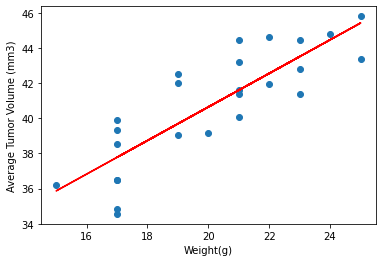

The correlation between mouse weight (g) and average tumor volume (mm3) is 0.84.


In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = average['Weight (g)']
y = average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept

plt.plot(x, regress_values, 'r-')
plt.scatter(x,y)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

correlation = round(x.corr(y),2)
print(f'The correlation between mouse weight (g) and average tumor volume (mm3) is {correlation}.')